In [607]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [608]:
datasets_path = '/content/drive/MyDrive/DataMining/CP3_Datasets/'

In [609]:
deliveries = pd.read_csv(datasets_path+'deliveries.csv')
matches = pd.read_csv(datasets_path+'matches.csv')
points_table = pd.read_csv(datasets_path+'points_table.csv')

In [610]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [611]:
deliveries.shape

(17380, 22)

In [612]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [613]:
matches.shape

(32, 18)

In [614]:
points_table.head()

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,Series Form,Next Match,For,Against
0,1,South Africa,7,6,1,0,0,12,2.290,LWWWW,"vs IND, AFG",2355/340.2,1588/343.0
1,2,India,6,6,0,0,0,12,1.405,WWWWW,"vs SL, SA, NED",1430/246.2,1320/300.0
2,3,Australia,6,4,2,0,0,8,0.970,LWWWW,"vs ENG, AFG, BAN",1745/285.2,1499/291.2
3,4,New Zealand,7,4,3,0,0,8,0.484,WWLLL,"vs PAK, SL",1964/329.1,1908/348.0
4,5,Pakistan,7,3,4,0,0,6,-0.024,LLLLW,"vs NZ, ENG",1884/330.5,1869/326.5


In [615]:
points_table.shape

(10, 13)

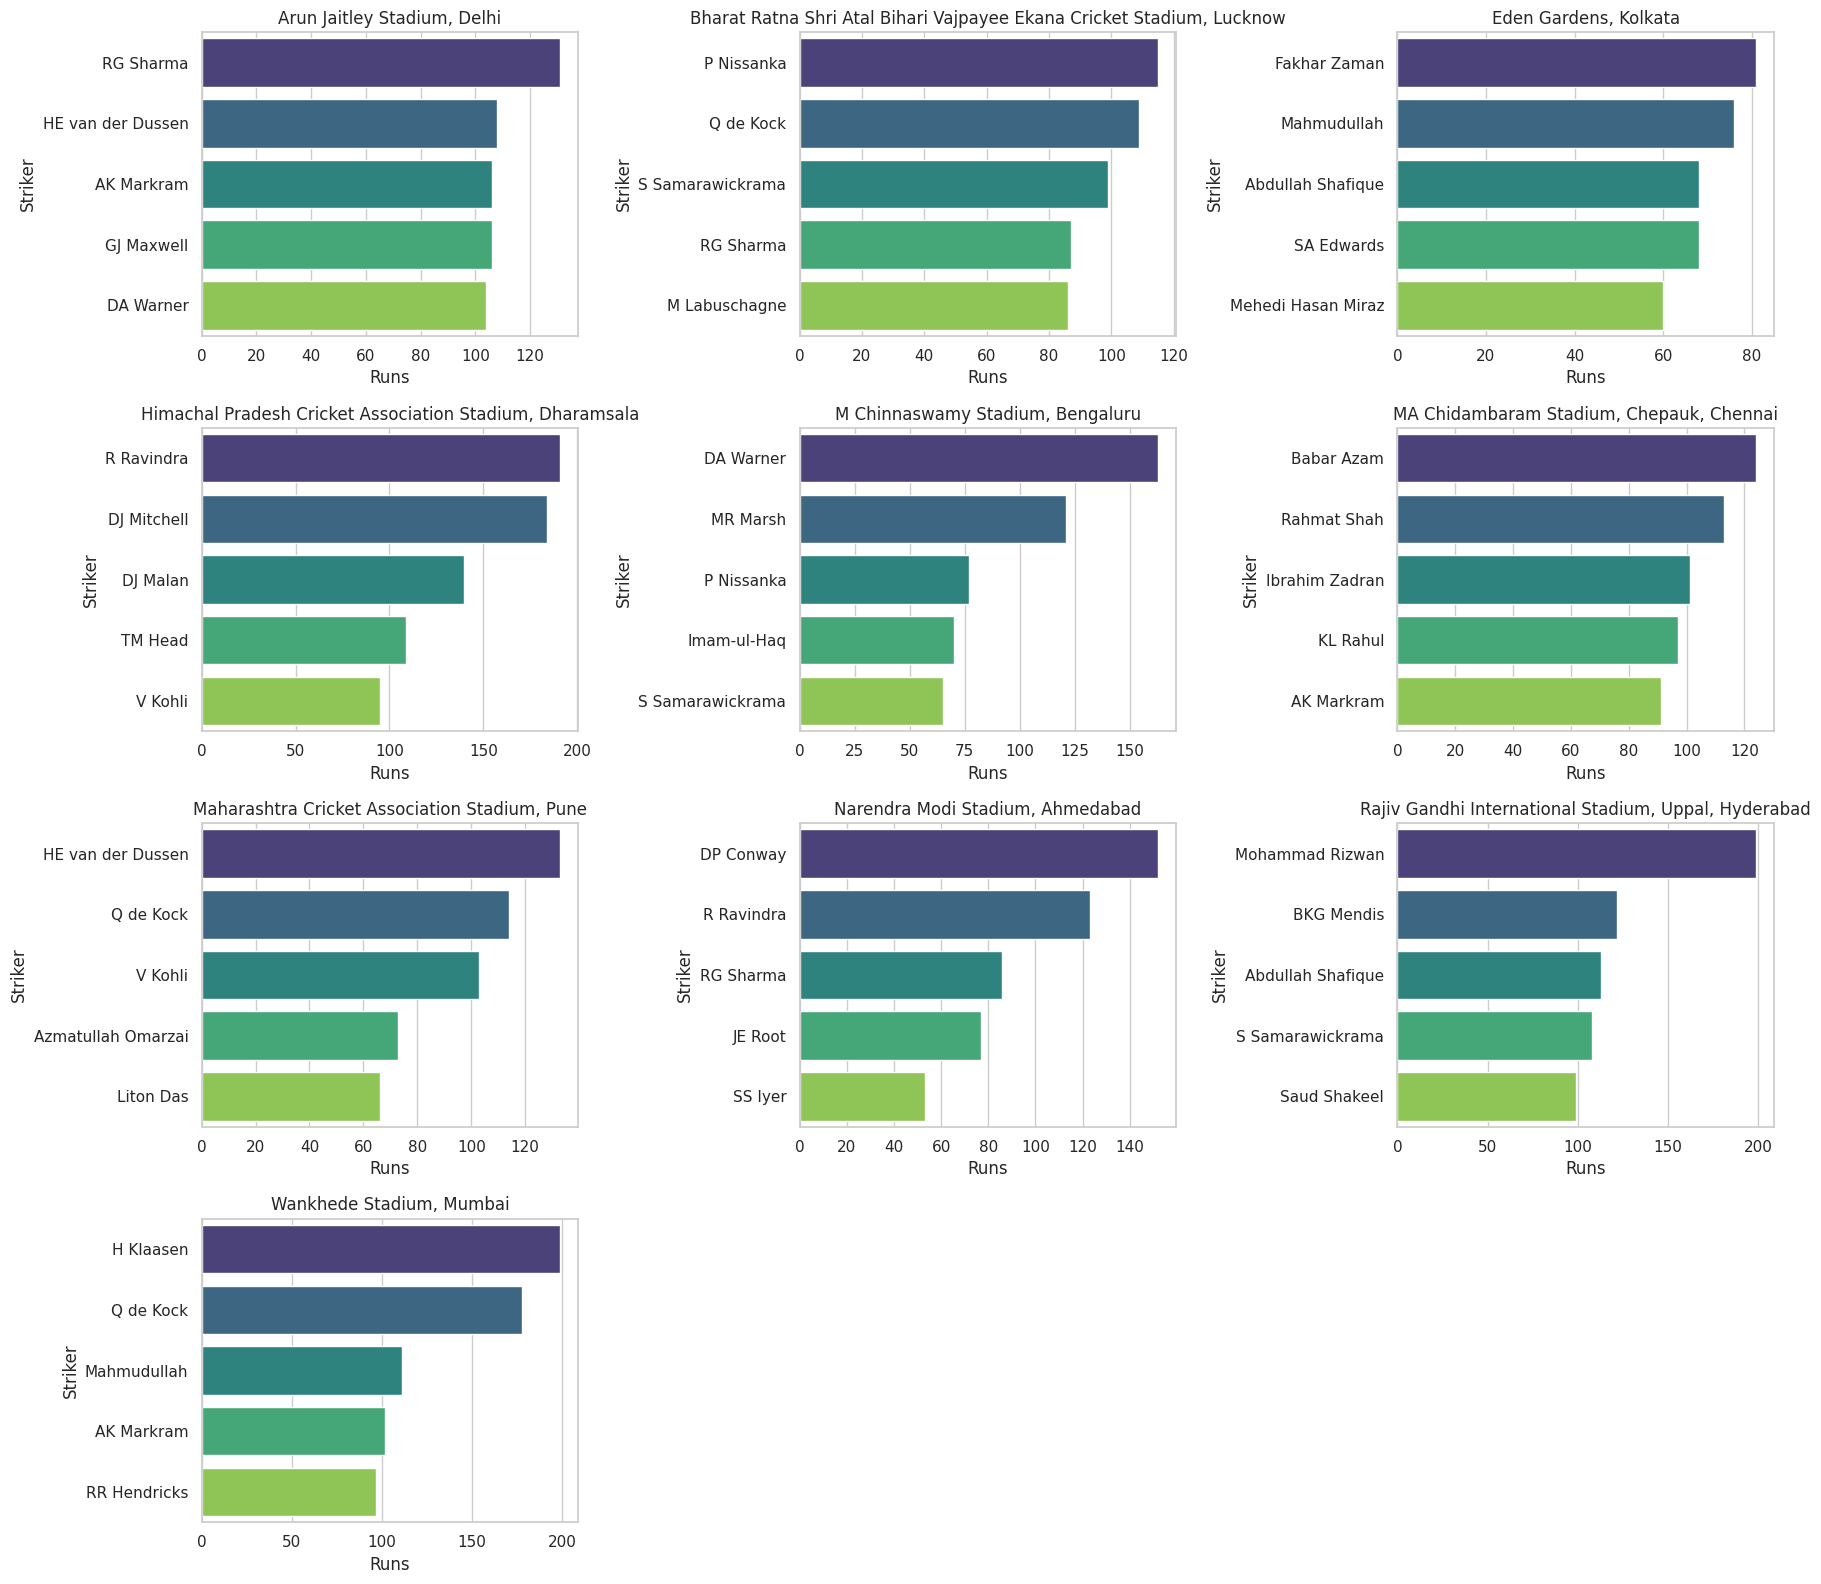

In [616]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

venue_wise_striker_runs = deliveries.groupby(['venue', 'striker'])['runs_off_bat'].sum().reset_index()
venue_wise_striker_runs_top5 = venue_wise_striker_runs.groupby('venue').apply(lambda x: x.nlargest(5, 'runs_off_bat')).reset_index(drop=True)
sns.set(style="whitegrid")

num_unique_venues = len(venue_wise_striker_runs_top5['venue'].unique())

num_rows = (num_unique_venues + 2) // 3

plt.figure(figsize=(18, 4 * num_rows))

for idx, venue in enumerate(venue_wise_striker_runs_top5['venue'].unique()):
    venue_data = venue_wise_striker_runs_top5[venue_wise_striker_runs_top5['venue'] == venue]
    plt.subplot(num_rows, 3, idx + 1)

    sns.barplot(x='runs_off_bat', y='striker', data=venue_data, palette='viridis')
    plt.title(venue)
    plt.xlabel('Runs')
    plt.ylabel('Striker')
    plt.tight_layout()

# Show the plot
plt.show()


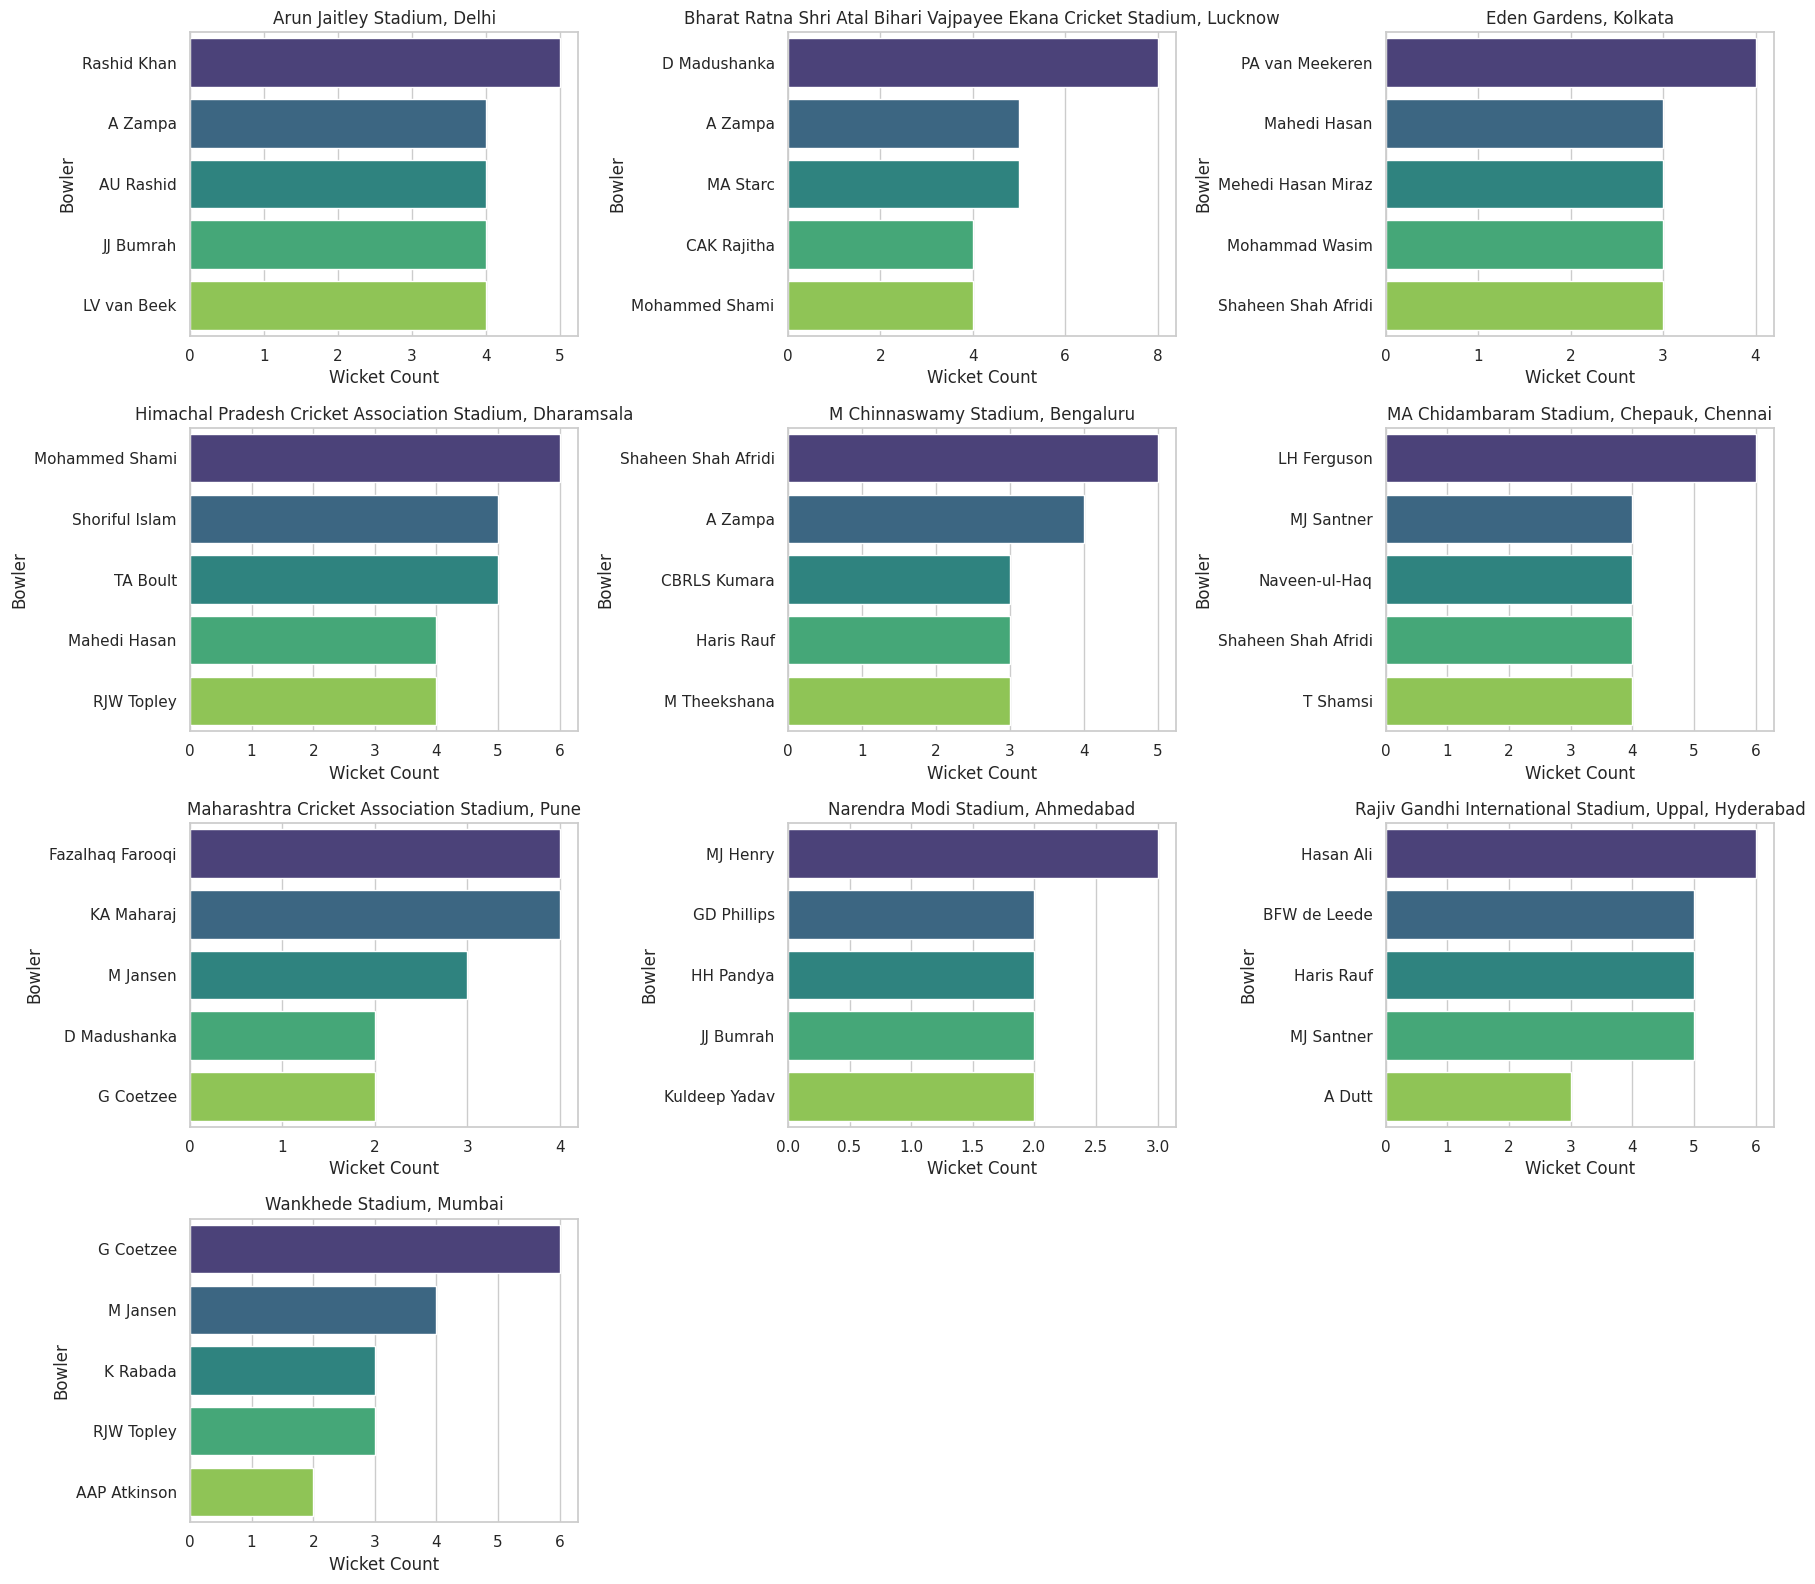

In [617]:
wickets = deliveries[deliveries['wicket_type'].notna()]
venue_wickets = wickets.groupby(['venue', 'bowler']).size().reset_index(name='wicket_count')
top5_bowlers=venue_wickets.groupby('venue').apply(lambda x: x.nlargest(5, 'wicket_count')).reset_index(drop=True)

sns.set(style="whitegrid")

num_unique_venues = len(top5_bowlers['venue'].unique())

num_rows = (num_unique_venues + 2) // 3

plt.figure(figsize=(18, 4 * num_rows))

for idx, venue in enumerate(top5_bowlers['venue'].unique()):
    venue_data = top5_bowlers[top5_bowlers['venue'] == venue]
    plt.subplot(num_rows, 3, idx + 1)

    sns.barplot(x='wicket_count', y='bowler', data=venue_data, palette='viridis')
    plt.title(venue)
    plt.xlabel('Wicket Count')
    plt.ylabel('Bowler')
    plt.tight_layout()

# Show the plot
plt.show()

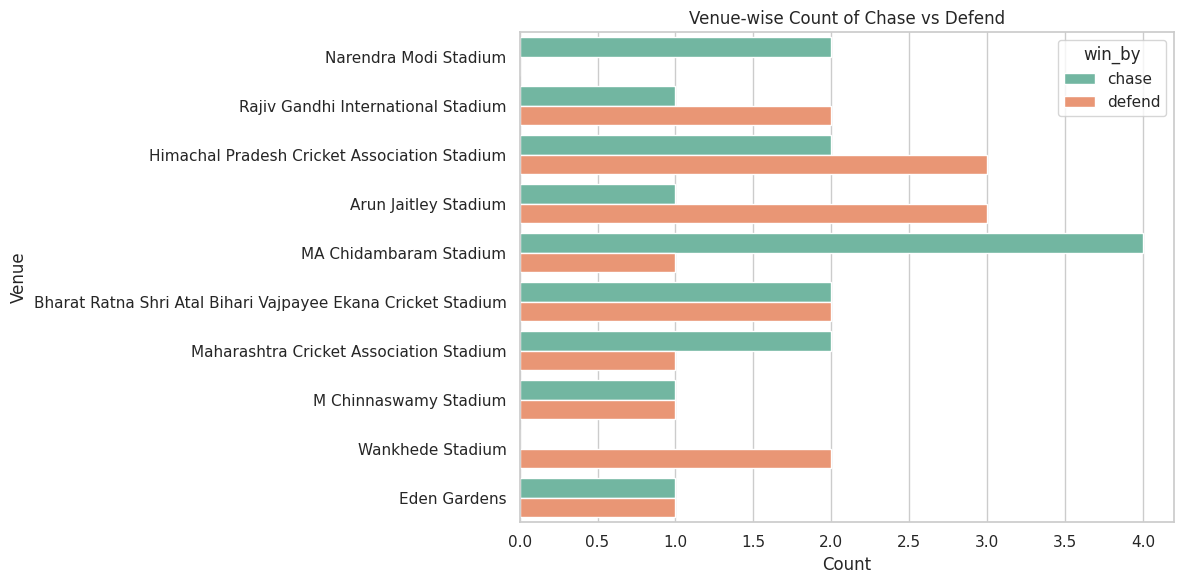

In [618]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

venue_wise_wins = matches[['venue', 'winner_runs', 'winner_wickets']].copy()

venue_wise_wins['win_by'] = np.where(matches['winner_runs'].isna(), 'chase', 'defend')

venue_wise_wins.drop(['winner_runs', 'winner_wickets'], axis=1, inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(y='venue', hue='win_by', data=venue_wise_wins, palette='Set2')
plt.title('Venue-wise Count of Chase vs Defend')
plt.xlabel('Count')
plt.ylabel('Venue')

# Show the plot
plt.tight_layout()
plt.show()


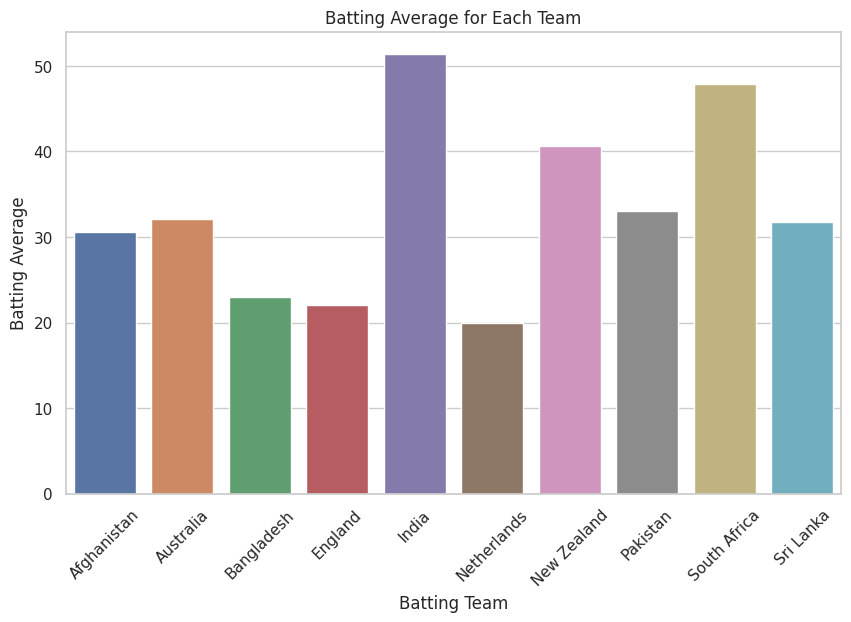

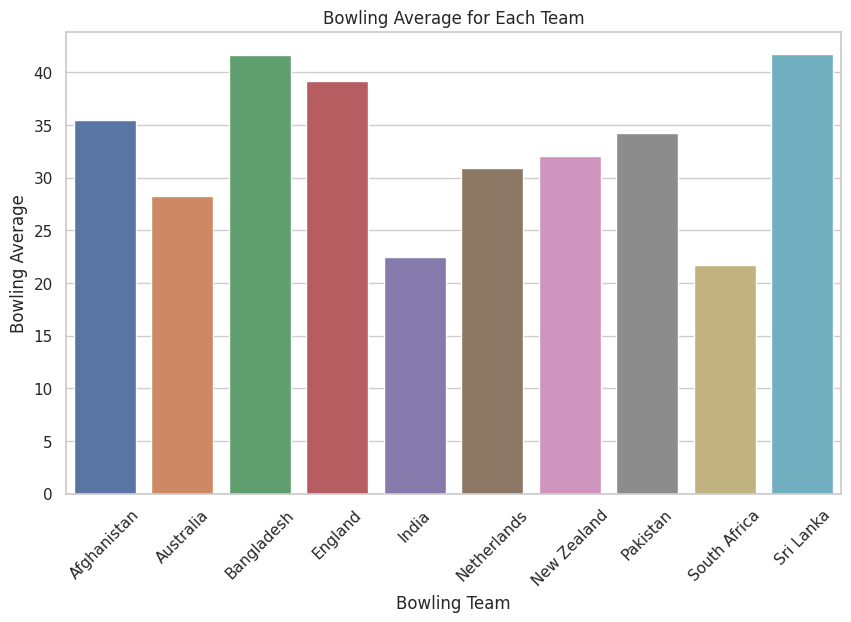

In [619]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'deliveries'
# You might need to load your data into a DataFrame using pd.read_csv or another method.

# Create a DataFrame with relevant columns for batting performance
batting_data = deliveries.groupby('batting_team').agg({
    'runs_off_bat': 'sum',
    'player_dismissed': 'count',
    'extras': 'sum'
}).reset_index()

# Calculate batting averages
batting_data['batting_average'] = batting_data['runs_off_bat'] / batting_data['player_dismissed']

# Visualize Batting Average
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='batting_average', data=batting_data)
plt.title('Batting Average for Each Team')
plt.xlabel('Batting Team')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.show()

# Create a DataFrame with relevant columns for bowling performance
bowling_data = deliveries.groupby('bowling_team').agg({
    'runs_off_bat': 'sum',
    'wicket_type': lambda x: x.notnull().sum(),
    'extras': 'sum'
}).reset_index()

# Calculate bowling averages
bowling_data['bowling_average'] = bowling_data['runs_off_bat'] / bowling_data['wicket_type']

# Visualize Bowling Average
plt.figure(figsize=(10, 6))
sns.barplot(x='bowling_team', y='bowling_average', data=bowling_data)
plt.title('Bowling Average for Each Team')
plt.xlabel('Bowling Team')
plt.ylabel('Bowling Average')
plt.xticks(rotation=45)
plt.show()

# Identify teams with the highest and lowest averages in batting
highest_batting_average_team = batting_data.loc[batting_data['batting_average'].idxmax()]
lowest_batting_average_team = batting_data.loc[batting_data['batting_average'].idxmin()]

# Identify teams with the highest and lowest averages in bowling
highest_bowling_average_team = bowling_data.loc[bowling_data['bowling_average'].idxmax()]
lowest_bowling_average_team = bowling_data.loc[bowling_data['bowling_average'].idxmin()]



In [620]:
icc_rankings = pd.read_csv(datasets_path+'icc_rankings.csv')
icc_rankings

,Pos,Team,Matches,Points,Rating
0,1,India,52,"6,290",121
1,2,Australia,38,"4,318",114
2,3,South Africa,32,"3,550",111
3,4,Pakistan,35,"3,874",111
4,5,New Zealand,41,"4,189",102
5,6,England,36,"3,509",97
6,7,Sri Lanka,46,"4,082",89
7,8,Bangladesh,43,"3,772",88
8,9,Afghanistan,28,"2,408",86
9,14,Netherlands,35,"1,445",41


# Model

In [621]:
# Import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [622]:
historical_matches = pd.read_csv(datasets_path+'historical_matches.csv')
historical_matches.head()

,Date,Team_1,Team_2,Winner,Margin,Ground,City
0,2015-01-08,Afghanistan,Scotland,Afghanistan,8 wickets,ICC Academy,Dubai
1,2015-01-11,New Zealand,Sri Lanka,New Zealand,3 wickets,Hagley Oval,Christchurch
2,2015-01-12,Ireland,Scotland,Ireland,3 wickets,Dubai International Cricket Stadium,NaN
3,2015-01-14,Afghanistan,Scotland,Scotland,150 runs,Sheikh Zayed Stadium,Abu Dhabi
4,2015-01-15,New Zealand,Sri Lanka,Sri Lanka,6 wickets,Seddon Park,Hamilton


In [623]:
# Cleaning the Data

worldcup_teams = list(points_table['Team'].unique())

mask = (historical_matches['Team_1'].isin(worldcup_teams)) & (historical_matches['Team_2'].isin(worldcup_teams))
cleaned_historical_matches = historical_matches[mask]

cleaned_historical_matches = cleaned_historical_matches.drop(['Date', 'Margin', 'Ground'], axis=1)
cleaned_historical_matches = cleaned_historical_matches.dropna(subset=['Winner'])
cleaned_historical_matches.head()

,Team_1,Team_2,Winner,City
1,New Zealand,Sri Lanka,New Zealand,Christchurch
4,New Zealand,Sri Lanka,Sri Lanka,Hamilton
5,Australia,England,Australia,NaN
10,Australia,India,Australia,NaN
11,England,India,England,Brisbane


In [624]:
ranking = pd.read_csv(datasets_path+'icc_rankings.csv')

In [625]:
# Building the model
# The prediction label: The winning_team column will show "1" if Team 1 has won, and "2" if Team 2 has won.
cleaned_historical_matches = cleaned_historical_matches.reset_index(drop=True)
cleaned_historical_matches.loc[cleaned_historical_matches['Winner'] == cleaned_historical_matches['Team_1'], 'winning_team']=1
cleaned_historical_matches.loc[cleaned_historical_matches['Winner'] == cleaned_historical_matches['Team_2'], 'winning_team']=2
cleaned_historical_matches = cleaned_historical_matches.drop(['Winner'], axis=1)
cleaned_historical_matches['winning_team']=cleaned_historical_matches['winning_team'].astype(int)
cleaned_historical_matches.head()

,Team_1,Team_2,City,winning_team
0,New Zealand,Sri Lanka,Christchurch,1
1,New Zealand,Sri Lanka,Hamilton,2
2,Australia,England,NaN,1
3,Australia,India,NaN,1
4,England,India,Brisbane,1


In [626]:
def create_training_input(existing_df):
  teams = list(points_table['Team'].unique())
  teams = sorted(teams)
  new_df = []
  for index, row in existing_df.iterrows():
    # Create a dictionary to hold the values
    input_dict = {}
    # Set all values to 0
    for team in teams:
        input_dict[f'Team_1_{team}'] = 0
        input_dict[f'Team_2_{team}'] = 0

    # Set the values for the specified teams
    t1 = row['Team_1']
    t2 = row['Team_2']
    input_dict[f'Team_1_{t1}'] = 1
    input_dict[f'Team_2_{t2}'] = 1

    input_dict['winning_team'] = row['winning_team']

    new_df.append(input_dict)
  return pd.DataFrame(new_df)

In [627]:
# Convert team-1 and team-2 from categorical variables to continous inputs
final = create_training_input(cleaned_historical_matches)
# Separate X and y sets
X =final.drop(['winning_team'], axis=1)
y = final["winning_team"]
# Divide the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [628]:
final.head()

,Team_1_Afghanistan,Team_2_Afghanistan,Team_1_Australia,Team_2_Australia,Team_1_Bangladesh,Team_2_Bangladesh,Team_1_England,Team_2_England,Team_1_India,Team_2_India,...,Team_2_Netherlands,Team_1_New Zealand,Team_2_New Zealand,Team_1_Pakistan,Team_2_Pakistan,Team_1_South Africa,Team_2_South Africa,Team_1_Sri Lanka,Team_2_Sri Lanka,winning_team
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [629]:
# model = LogisticRegression()
# model.fit(X_train, y_train)

# train_score = model.score(X_train, y_train)
# test_score = model.score(X_test, y_test)

# print("Train Accuracy : "+'%.3f'%(train_score))
# print("Test Accuracy : "+'%.3f'%(test_score))

In [630]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming X_train, y_train, X_test, y_test are your training and testing sets
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - accuracy: 0.4627 - val_loss: 0.0000e+00 - val_accuracy: 0.6667
Epoch 2/50
 1/11 [=>............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5791 - val_loss: 0.0000e+00 - val_accuracy: 0.6806
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5821 - val_loss: 0.0000e+00 - val_accuracy: 0.6806
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5821 - val_loss: 0.0000e+00 - val_accuracy: 0.6806
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5821 - val_loss: 0.0000e+00 - val_accuracy: 0.6806
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5821 - val_loss: 0.0000e+00 - val_accuracy: 0.6806
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.5821 - val_loss: 0.0000e+00 - val_accuracy: 0.6806
Epoch 8/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5821 - val_loss: 0.0000e+0

In [631]:
ranking = pd.read_csv(datasets_path+'icc_rankings.csv')
fixtures = pd.read_csv(datasets_path+'fixtures.csv')

pred_set = []
ranking.head()

,Pos,Team,Matches,Points,Rating
0,1,India,52,"6,290",121
1,2,Australia,38,"4,318",114
2,3,South Africa,32,"3,550",111
3,4,Pakistan,35,"3,874",111
4,5,New Zealand,41,"4,189",102


In [632]:
# for index, row in fixtures.iterrows():
#   if row['Team_2']=='Sri Lanka':
#     row['Team_1'], row['Team_2'] = row['Team_2'], row['Team_1']
#     break

# for index, row in fixtures.iterrows():
#   if row['Team_1']=='India':
#     row['Team_1'], row['Team_2'] = row['Team_2'], row['Team_1']
#     break

In [633]:
# Create new columns with ranking position of each team
fixtures.insert(1,'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Pos']))
fixtures.insert(2,'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Pos']))
# We only need the group stage games, so slice the dataset and display the last 5 rows
fixtures = fixtures.iloc[:45, :]
fixtures.tail()
print(fixtures['Team_1'].unique())
print(fixtures['Team_2'].unique())

['England' 'Pakistan' 'Bangladesh' 'Sri Lanka' 'Australia' 'New Zealand'
 'India' 'South Africa' 'Netherlands' 'Afghanistan']
['New Zealand' 'Netherlands' 'Afghanistan' 'South Africa' 'India'
 'Bangladesh' 'Sri Lanka' 'Pakistan' 'England' 'Australia']


In [634]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
  t1 = ranking.loc[ranking['Team']==row['Team_1'], 'Pos'].values[0]
  t2 = ranking.loc[ranking['Team']==row['Team_2'], 'Pos'].values[0]
  if t1<t2:
    pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
  else:
    pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,New Zealand,England,None
1,Pakistan,Netherlands,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,India,Australia,None


In [635]:
# Get, dummy variables and drop winning_team column
pred_set = create_training_input(pred_set)
pred_set = pred_set.drop(['winning_team'], axis=1)
print(pred_set.shape)
pred_set.head()

(45, 20)


,Team_1_Afghanistan,Team_2_Afghanistan,Team_1_Australia,Team_2_Australia,Team_1_Bangladesh,Team_2_Bangladesh,Team_1_England,Team_2_England,Team_1_India,Team_2_India,Team_1_Netherlands,Team_2_Netherlands,Team_1_New Zealand,Team_2_New Zealand,Team_1_Pakistan,Team_2_Pakistan,Team_1_South Africa,Team_2_South Africa,Team_1_Sri Lanka,Team_2_Sri Lanka
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [636]:
# Get the results of league matches
def Add_Point(data, key):
  if key in data:
    data[key]+=2
  else:
    data[key]=0

predictions = model.predict(pred_set)
points = {}
for i in range(fixtures.shape[0]):
  print(backup_pred_set.iloc[i, 1] +" and " + backup_pred_set.iloc[i, 0])
  if predictions[i] == 1:
    winner = backup_pred_set.iloc[i,0]
    print("Winner:"+ winner)
  else:
    winner = backup_pred_set.iloc[i,1]
    print("Winner:"+ winner)
  Add_Point(points, winner)
  print("")

2/2 [==============================] - 0s 13ms/step
England and New Zealand
Winner:New Zealand

Netherlands and Pakistan
Winner:Pakistan

Afghanistan and Bangladesh
Winner:Bangladesh

Sri Lanka and South Africa
Winner:South Africa

Australia and India
Winner:India

Netherlands and New Zealand
Winner:New Zealand

Bangladesh and England
Winner:England

Sri Lanka and Pakistan
Winner:Pakistan

Afghanistan and India
Winner:India

South Africa and Australia
Winner:Australia

Bangladesh and New Zealand
Winner:New Zealand

Pakistan and India
Winner:India

Afghanistan and England
Winner:England

Sri Lanka and Australia
Winner:Australia

Netherlands and South Africa
Winner:South Africa

Afghanistan and New Zealand
Winner:New Zealand

Bangladesh and India
Winner:India

Pakistan and Australia
Winner:Australia

Netherlands and Sri Lanka
Winner:Sri Lanka

England and South Africa
Winner:South Africa

New Zealand and India
Winner:India

Afghanistan and Pakistan
Winner:Pakistan

Bangladesh and South A

In [637]:
# Sort the dictionary items by values in descending order
sorted_teams = sorted(points.items(), key=lambda x: x[1], reverse=True)

# Get the top 4 teams
top_4_teams = [team[0] for team in sorted_teams[:4]]

print("Top 4 Teams:")
print(top_4_teams)

Top 4 Teams:
['India', 'Australia', 'South Africa', 'Pakistan']


In [638]:
semi = [(top_4_teams[0], top_4_teams[3]),(top_4_teams[1],top_4_teams[2])]
semi = [('India', 'New Zealand'),('South Africa','Australia')]

In [639]:
def create_prediction_input(team_1, team_2):
    teams = list(points_table['Team'].unique())
    teams = sorted(teams)
    # Create a dictionary to hold the values
    input_dict = {}
    # Set all values to 0
    for team in teams:
        input_dict[f'Team_1_{team}'] = 0
        input_dict[f'Team_2_{team}'] = 0

    # Set the values for the specified teams
    input_dict[f'Team_1_{team_1}'] = 1
    input_dict[f'Team_2_{team_2}'] = 1

    # Create a DataFrame from the dictionary
    input_df = pd.DataFrame([input_dict])
    return input_df

def clean_and_predict(matches, model):
  for mat in matches:
    X = create_prediction_input(mat[0], mat[1])
    X = X[X_train.columns]
    # print(X.columns)
    # print(X_train.columns)
    y = model.predict(X)

    print(mat[0]+ ' vs '+ mat[1])
    if y == 1:
      print('winner : '+mat[0]+'\n')
    else:
      print('winner : '+mat[1]+'\n')


print('Prediction of Semi Finals \n')
clean_and_predict(semi, model)

Prediction of Semi Finals 

1/1 [==============================] - 0s 30ms/step
India vs New Zealand
winner : India

1/1 [==============================] - 0s 33ms/step
South Africa vs Australia
winner : South Africa



In [640]:
final = [('India', 'South Africa')]
print('Prediction of Finals\n')
clean_and_predict(final, model)

Prediction of Finals

1/1 [==============================] - 0s 31ms/step
India vs South Africa
winner : India

